<a href="https://colab.research.google.com/github/Anees31-AI/Unsupervised_Learning_algorithms/blob/main/unsupervised_algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Loading Dataset**

In [1]:
from sklearn.datasets import load_wine
import pandas as pd
wine=load_wine()
X=wine.data
y=wine.target #True wine classes

df=pd.DataFrame(X,columns=wine.feature_names)
print(df.head())

   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  
0                  

**K-Means Clustering**

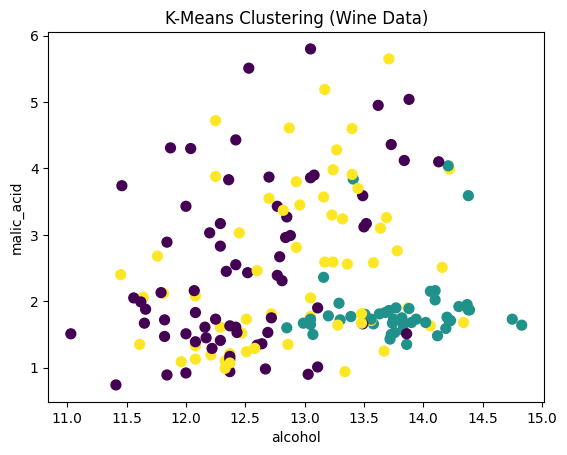

In [2]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
kmeans=KMeans(n_clusters=3,random_state=0)
clusters_kmeans=kmeans.fit_predict(X)

plt.scatter(X[:,0],X[:,1],c=clusters_kmeans,cmap='viridis',s=50)
plt.xlabel(wine.feature_names[0])
plt.ylabel(wine.feature_names[1])
plt.title('K-Means Clustering (Wine Data)')
plt.show()

**Hirerchical Clustering**

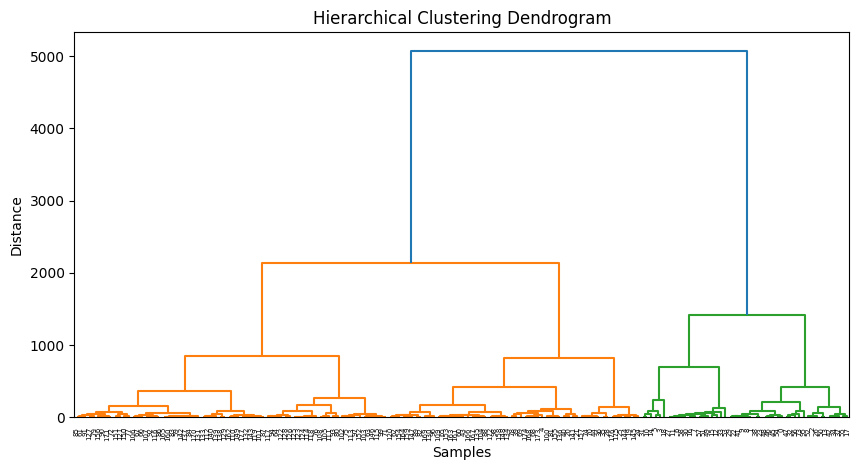

In [3]:
from scipy.cluster.hierarchy import dendrogram,linkage

linked=linkage(X,method='ward')
plt.figure(figsize=(10,5))
dendrogram(linked,orientation='top',distance_sort='descending',show_leaf_counts=False)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

**DBSCAN**

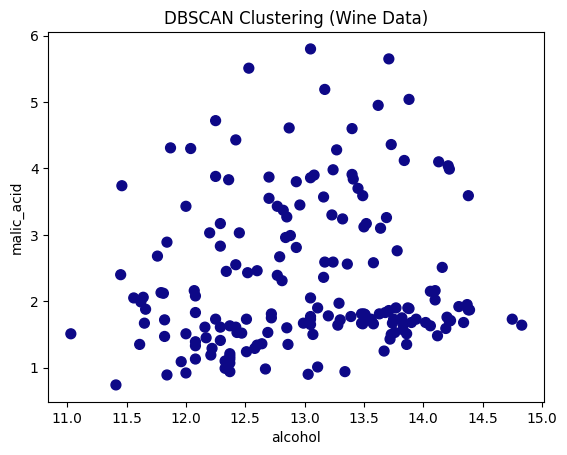

In [4]:
from sklearn.cluster import DBSCAN
dbscan=DBSCAN(eps=3,min_samples=5)
clusters_dbscan=dbscan.fit_predict(X)
plt.scatter(X[:,0],X[:,1],c=clusters_dbscan,cmap='plasma',s=50)
plt.xlabel(wine.feature_names[0])
plt.ylabel(wine.feature_names[1])
plt.title('DBSCAN Clustering (Wine Data)')
plt.show()

**PCA**

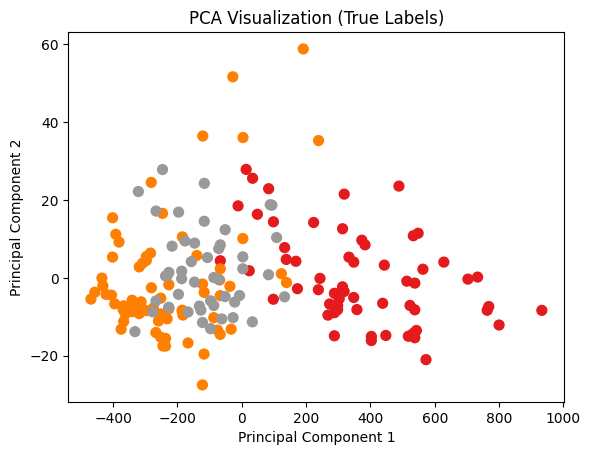

In [6]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
X_pca=pca.fit_transform(X)

plt.scatter(X_pca[:,0],X_pca[:,1],c=y,cmap='Set1',s=50)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Visualization (True Labels)')
plt.show()

**t-SNE**

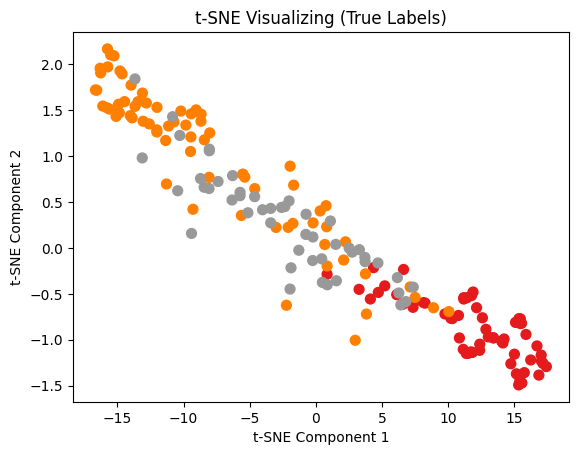

In [7]:
from sklearn.manifold import TSNE
tsne=TSNE(n_components=2,random_state=0,perplexity=30)
X_tsne=tsne.fit_transform(X)
plt.scatter(X_tsne[:,0],X_tsne[:,1],c=y,cmap='Set1',s=50)
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE Visualizing (True Labels)')
plt.show()

**Evaluating Clustering Results**

In [8]:
from sklearn.metrics import adjusted_rand_score
ari_kmeans=adjusted_rand_score(y,clusters_kmeans)
print(f'Adjusted Rand Index for K-Means:{ari_kmeans:.3f}')

Adjusted Rand Index for K-Means:0.371


**K-Means Clustering Results vs True Labels**

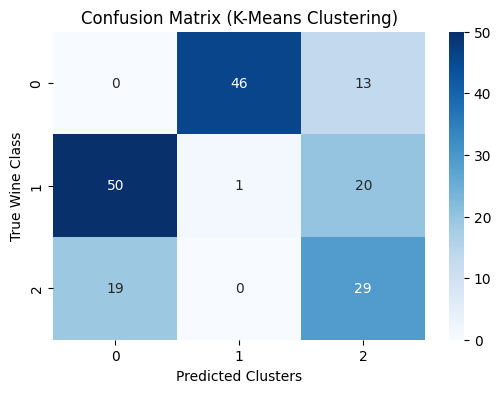

In [9]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

#Confusion Matrix
conf_matrix=confusion_matrix(y,clusters_kmeans)
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix,annot=True,cmap='Blues',fmt='d')
plt.xlabel('Predicted Clusters')
plt.ylabel('True Wine Class')
plt.title('Confusion Matrix (K-Means Clustering)')
plt.show()

**Silhouette Score for K-Means**

In [10]:
from sklearn.metrics import silhouette_score
silhouette_kmeans=silhouette_score(X,clusters_kmeans)
print(f'Silhouette Score for K-Means:{silhouette_kmeans:.3f}')

Silhouette Score for K-Means:0.571


**DBSCAN Clustering Results vs True Labels**

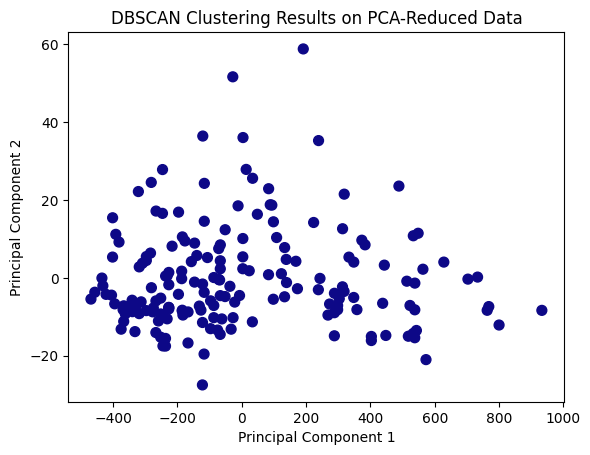

In [11]:
# Visualize DBSCAN clusters vs true labels
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters_dbscan, cmap='plasma', s=50)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('DBSCAN Clustering Results on PCA-Reduced Data')
plt.show()

# Confusion matrix for DBSCAN (exclude noise points, label -1)
valid_idx = clusters_dbscan != -1
if valid_idx.sum() > 0:
    conf_matrix_dbscan = confusion_matrix(y[valid_idx], clusters_dbscan[valid_idx])
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix_dbscan, annot=True, cmap='Oranges', fmt='d')
    plt.xlabel('Predicted Cluster (DBSCAN)')
    plt.ylabel('True Wine Class')
    plt.title('Confusion Matrix (DBSCAN, Excluding Noise)')
    plt.show()


**Tuning DBSCAN**

In [12]:
# Try different eps values
for eps_val in [1.5, 2, 2.5, 3]:
    dbscan_tuned = DBSCAN(eps=eps_val, min_samples=5)
    labels_tuned = dbscan_tuned.fit_predict(X)
    n_clusters = len(set(labels_tuned)) - (1 if -1 in labels_tuned else 0)
    silhouette = silhouette_score(X, labels_tuned) if n_clusters > 1 else -1
    print(f'eps={eps_val}: #clusters={n_clusters}, silhouette={silhouette:.3f}')


eps=1.5: #clusters=0, silhouette=-1.000
eps=2: #clusters=0, silhouette=-1.000
eps=2.5: #clusters=0, silhouette=-1.000
eps=3: #clusters=0, silhouette=-1.000


**Comparing PCA and t-SNE side by side**

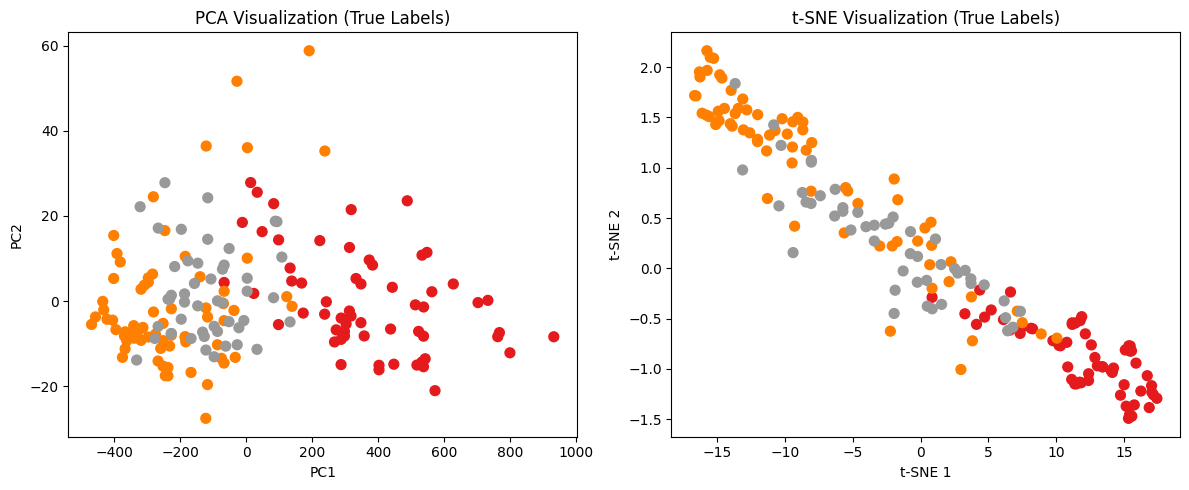

In [13]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# PCA plot
axs[0].scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='Set1', s=50)
axs[0].set_title('PCA Visualization (True Labels)')
axs[0].set_xlabel('PC1')
axs[0].set_ylabel('PC2')

# t-SNE plot
axs[1].scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='Set1', s=50)
axs[1].set_title('t-SNE Visualization (True Labels)')
axs[1].set_xlabel('t-SNE 1')
axs[1].set_ylabel('t-SNE 2')

plt.tight_layout()
plt.show()
